# Importing the libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

# Creating the dataset

In [13]:
# Generate synthetic data using make_blobs
# x will contain the features (coordinates), y will contain the labels
x,y=datasets.make_blobs(n_samples=200,      # Generate 200 samples
                   n_features=2,       # Each sample has 2 features (2D data)
                   centers=[[2,2],[10,10]], # Define two cluster centers
                   center_box=(0,10),    # Bounding box for random center generation
                   cluster_std=3)      # Standard deviation of the clusters (spread)

In [14]:
# x

In [15]:
# y

In [16]:
# The Perceptron algorithm typically uses labels of +1 and -1.
# make_blobs creates labels 0 and 1.
# This line converts all labels with value 0 to -1.
y[y==0]=-1
# The line below is commented out, but would display the modified 'y' array if uncommented.
# y

# Visualise the Dataset

In [17]:
# Define a function to visualize the dataset and the decision boundary (hyperplane)
def show(w,w0,x,y):
    # Generate a range of x-values to plot the decision boundary line
    x_val=np.linspace(-5,10)
    # Calculate the corresponding y-values for the decision boundary
    # The line equation is w[0]*x + w[1]*y + w0 = 0, solved for y
    y_val= (-w[0]*x_val-w0)/w[1]
    # Plot the decision boundary line
    plt.plot(x_val,y_val)
    # Create a scatter plot of the data points (x). 
    # The color of each point is determined by its class label (y).
    plt.scatter(x[:,0],x[:,1],c=y)
    # Set the limits for the x-axis for better visualization, with a small padding.
    plt.xlim(x[:,0].min()-0.2,x[:,0].max()+0.2)
    # Set the limits for the y-axis for better visualization, with a small padding.
    plt.ylim(x[:,1].min()-0.2,x[:,1].max()+0.2)
    # Display the plot
    plt.show()

In [18]:
# Initialize the weights for the Perceptron model.
# 'w' is the weight vector, with one weight for each feature (2 in this case).
# The weights are initialized with random values from a normal (Gaussian) distribution.
w=np.random.normal(size=(2,))
# 'w0' is the bias term (or intercept).
# It is also initialized with a random value from a normal distribution.
w0=np.random.normal()
# Print the initialized weight vector and the bias term.
print(w,w0)
# Print the individual components of the weight vector and the bias term.
print(w[0],w[1],w0)

[-0.14801531  0.48565267] 0.24091575178625624
-0.14801530684532554 0.48565266632883974 0.24091575178625624


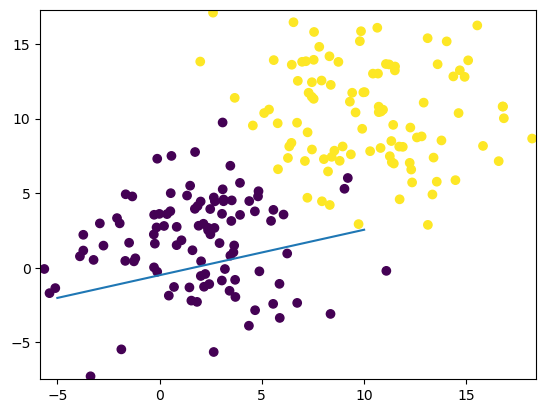

In [19]:
# Call the 'show' function to visualize the dataset and the initial, randomly placed decision boundary.
show(w,w0,x,y)

# Implementing Perceptron Algorithm

In [20]:
# Define a function to calculate the signed distance of a point 'x' from the hyperplane.
def dist_from_hyperplane(w,w0,x):
    # The formula for the signed distance is (w.x + w0) / ||w||.
    # np.dot(w,x) is the dot product of the weight vector and the point's feature vector.
    # np.linalg.norm(w) is the Euclidean norm (magnitude) of the weight vector.
    d = (np.dot(w,x)+w0)/np.linalg.norm(w)
    # Return the calculated signed distance.
    return d

In [21]:
# Define the main Perceptron training function.
def perceptron_training(x,y,w,w0,num_iter=100):
    # Loop for a specified number of iterations (epochs).
    for i in range(num_iter):
        # Print the current iteration number.
        print("Iteration Number : ",i+1)
        # Initialize a counter for misclassified points in this iteration.
        miss_classified_points=0
        # Loop through each data point (xi) and its corresponding true label (yi).
        for (xi,yi) in zip(x,y):
            # Calculate the signed distance of the point from the current hyperplane.
            d=dist_from_hyperplane(w,w0,xi)
            # Determine the predicted class label based on the sign of the distance.
            hs = np.sign(d)
            # Check if the predicted label is different from the true label.
            if hs != np.sign(yi):
                # If misclassified, increment the counter.
                miss_classified_points += 1
                # Update the weight vector using the Perceptron update rule: w = w + y*x
                w = w + (xi*yi)
                # Update the bias term: w0 = w0 + y
                w0 = w0 + np.sign(yi)
        # Print the accuracy for the current iteration.
        print(f"Current Accuracy : {100-(100*miss_classified_points/len(y))}")
        # Print the updated weights and bias.
        print(f"Weights are W1 : {w[0]}, W2 : {w[1]}, W0 : {w0}")
        # Visualize the decision boundary after the updates for this iteration.
        show(w,w0,x,y)
        # If there were no misclassified points in this iteration, the algorithm has converged.
        if miss_classified_points==0:
            # Return the final learned weights and bias.
            return w,w0
    # If the loop finishes without converging, return the current weights and bias.
    return w, w0

Iteration Number :  1
Current Accuracy : 77.5
Weights are W1 : 0.7730896978905291, W2 : 4.238465406338331, W0 : -22.759084248213746


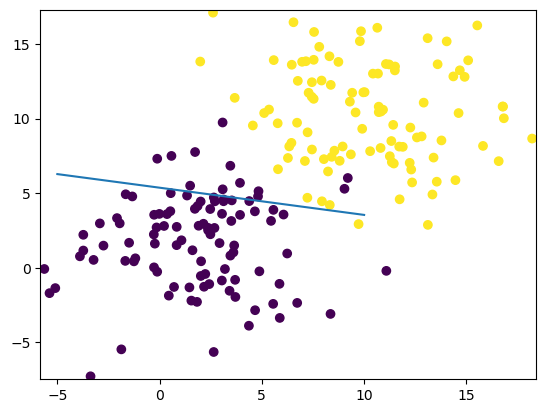

Iteration Number :  2
Current Accuracy : 85.0
Weights are W1 : 1.5662733216617646, W2 : 6.42069784566579, W0 : -34.759084248213746


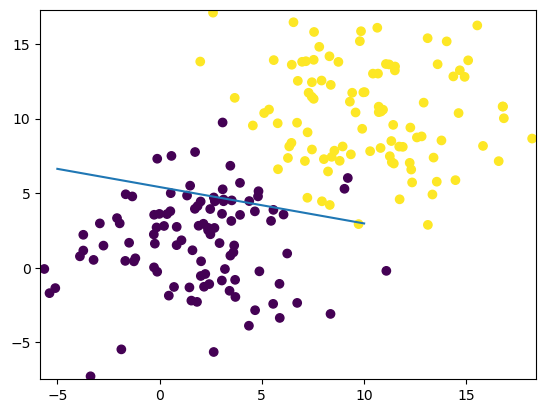

Iteration Number :  3
Current Accuracy : 77.5
Weights are W1 : -4.154886226982768, W2 : 7.915642047030231, W0 : -53.759084248213746


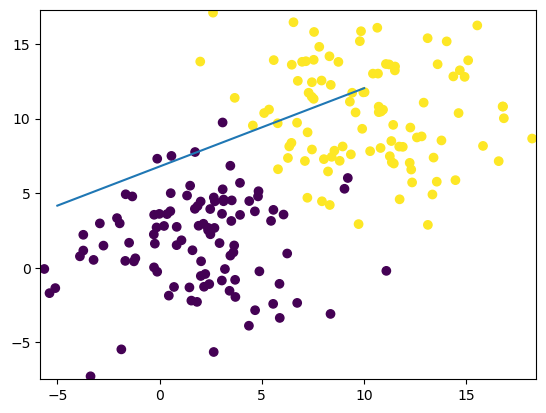

Iteration Number :  4
Current Accuracy : 86.5
Weights are W1 : 0.6854973367385915, W2 : 13.948365517305731, W0 : -62.759084248213746


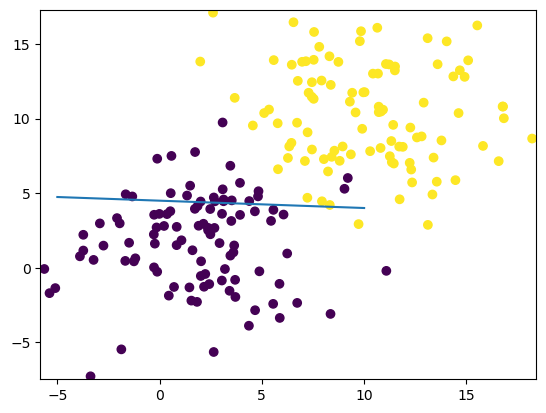

Iteration Number :  5
Current Accuracy : 87.5
Weights are W1 : -0.17934120436587175, W2 : 8.149489099228624, W0 : -71.75908424821375


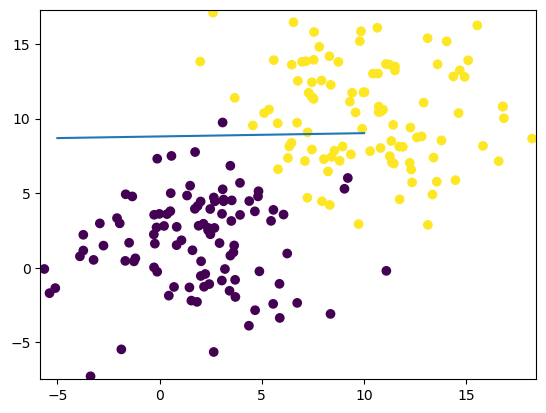

Iteration Number :  6
Current Accuracy : 91.5
Weights are W1 : 1.3416943386784936, W2 : 13.260945063884487, W0 : -76.75908424821375


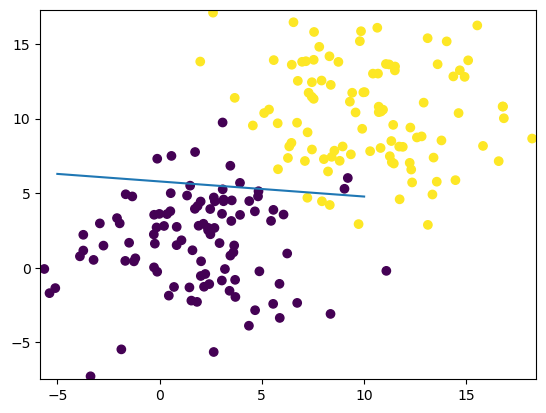

Iteration Number :  7
Current Accuracy : 89.0
Weights are W1 : 5.823060702315472, W2 : 7.144388258407708, W0 : -84.75908424821375


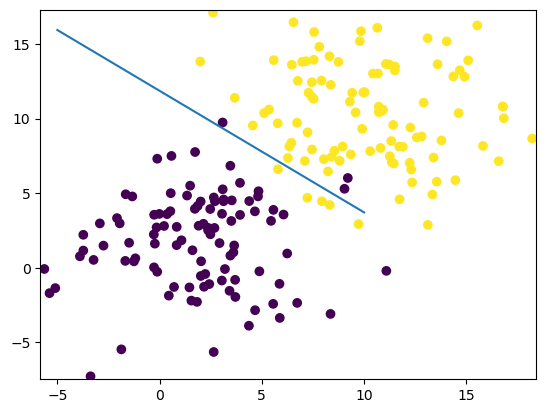

Iteration Number :  8
Current Accuracy : 92.0
Weights are W1 : 5.8235321565233615, W2 : 12.327568823512259, W0 : -88.75908424821375


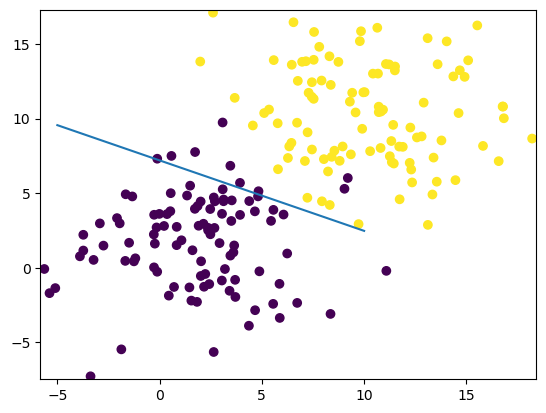

Iteration Number :  9
Current Accuracy : 91.0
Weights are W1 : 4.47145667599042, W2 : 7.575456290080376, W0 : -94.75908424821375


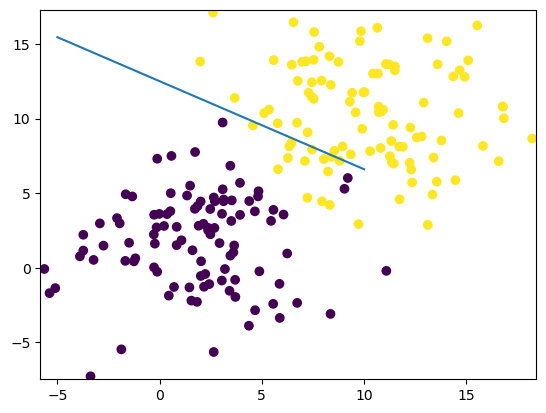

Iteration Number :  10
Current Accuracy : 93.0
Weights are W1 : 1.7316200917051177, W2 : 14.558485634512595, W0 : -98.75908424821375


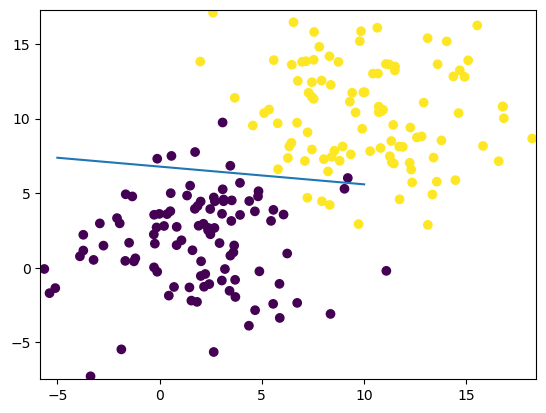

Iteration Number :  11
Current Accuracy : 91.5
Weights are W1 : 3.89656873640984, W2 : 13.428776493240452, W0 : -103.75908424821375


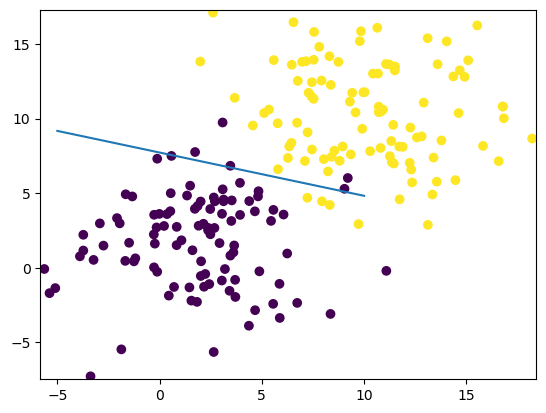

Iteration Number :  12
Current Accuracy : 93.0
Weights are W1 : 6.672091632603509, W2 : 12.632595767213063, W0 : -107.75908424821375


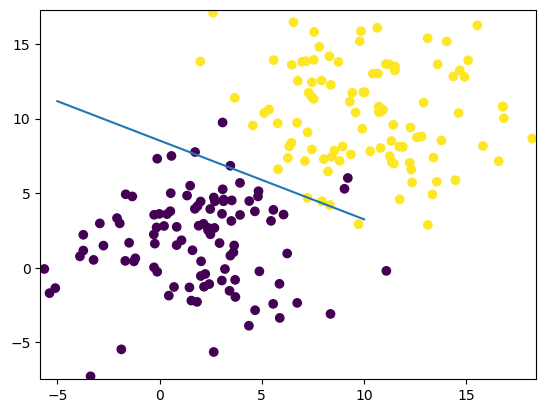

Iteration Number :  13
Current Accuracy : 94.5
Weights are W1 : 5.556405836469896, W2 : 15.58884803866364, W0 : -110.75908424821375


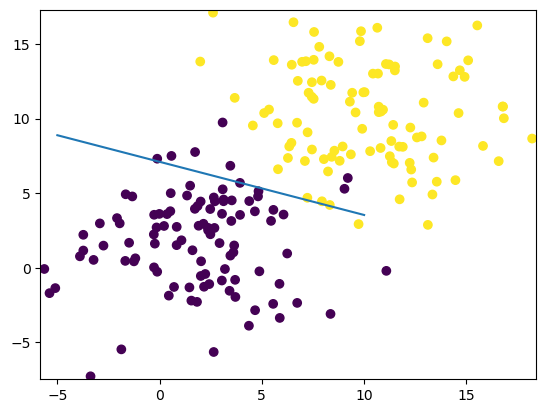

Iteration Number :  14
Current Accuracy : 93.0
Weights are W1 : 4.82559086819426, W2 : 11.574066358841247, W0 : -114.75908424821375


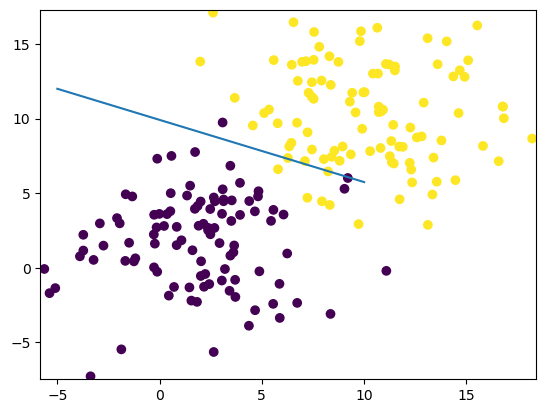

Iteration Number :  15
Current Accuracy : 92.0
Weights are W1 : 5.218115074314752, W2 : 14.766551423222978, W0 : -118.75908424821375
Current Accuracy : 92.0
Weights are W1 : 5.218115074314752, W2 : 14.766551423222978, W0 : -118.75908424821375


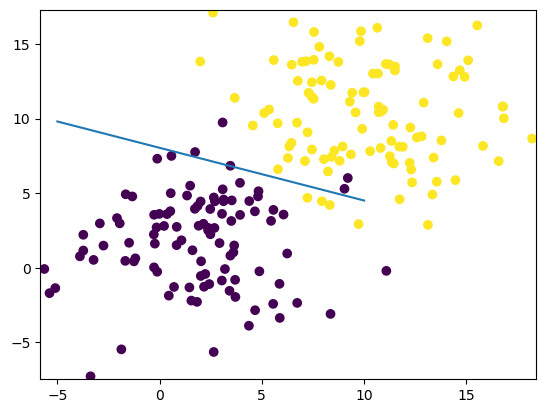

Iteration Number :  16
Current Accuracy : 92.0
Weights are W1 : 6.779126414833479, W2 : 15.762238917552065, W0 : -122.75908424821375


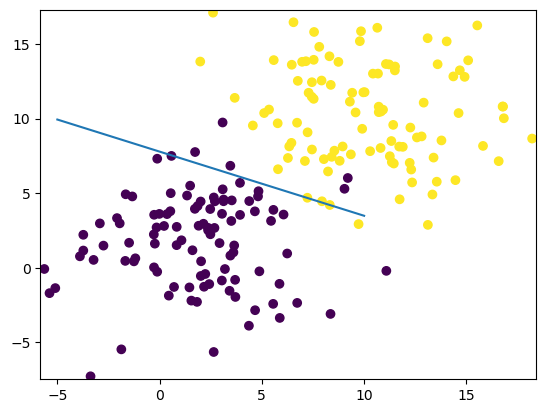

Iteration Number :  17
Current Accuracy : 91.0
Weights are W1 : 4.823703801394186, W2 : 17.088305701766412, W0 : -126.75908424821375
Current Accuracy : 91.0
Weights are W1 : 4.823703801394186, W2 : 17.088305701766412, W0 : -126.75908424821375


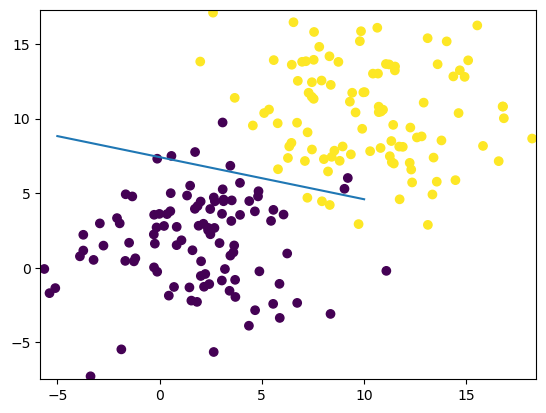

Iteration Number :  18
Current Accuracy : 93.5
Weights are W1 : 6.903845867299127, W2 : 16.86998452515325, W0 : -129.75908424821375


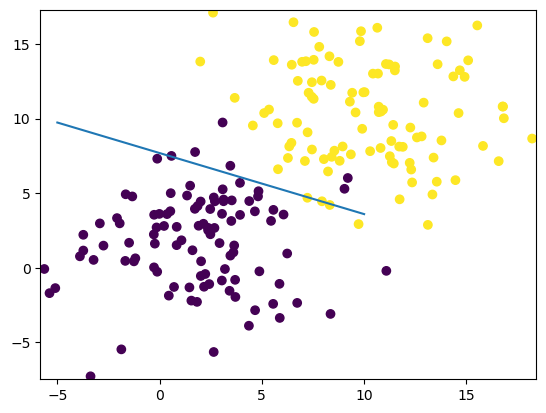

Iteration Number :  19
Current Accuracy : 91.0
Weights are W1 : 4.948423253859834, W2 : 18.1960513093676, W0 : -133.75908424821375


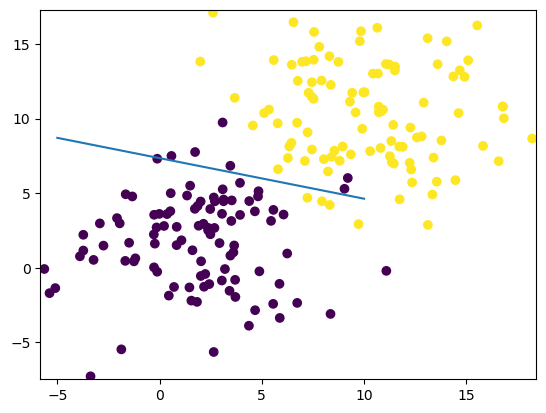

Iteration Number :  20
Current Accuracy : 94.5
Weights are W1 : 6.411381394240449, W2 : 14.920555859229392, W0 : -136.75908424821375


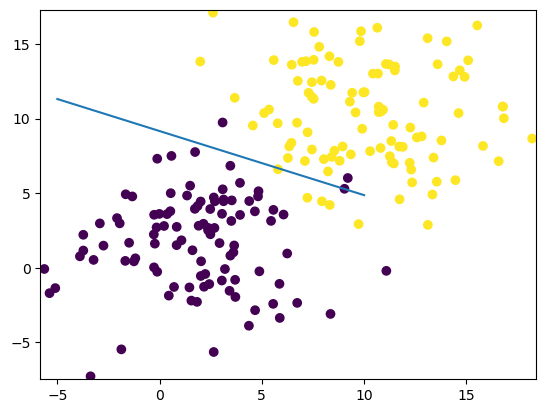

Iteration Number :  21
Current Accuracy : 92.5
Weights are W1 : 5.025320299680232, W2 : 18.522866856593932, W0 : -139.75908424821375


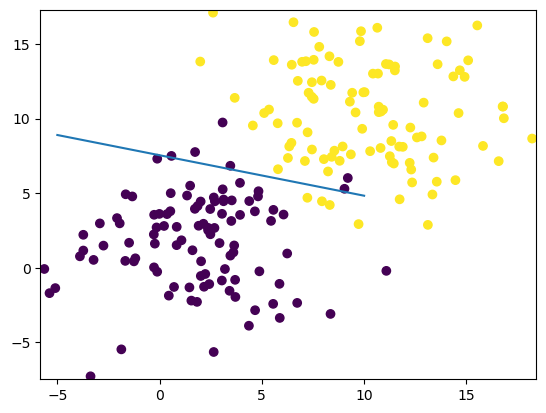

Iteration Number :  22
Current Accuracy : 93.5
Weights are W1 : 8.518955380893912, W2 : 19.06026947537018, W0 : -142.75908424821375
Current Accuracy : 93.5
Weights are W1 : 8.518955380893912, W2 : 19.06026947537018, W0 : -142.75908424821375


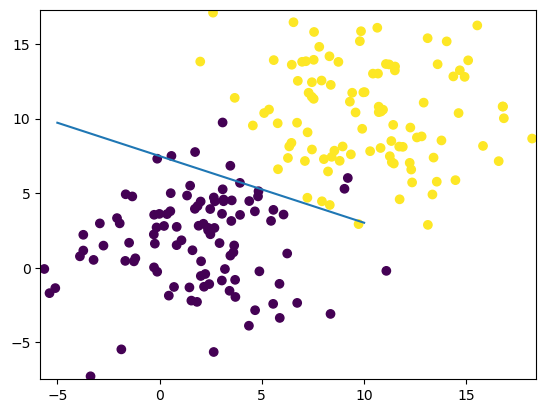

Iteration Number :  23
Current Accuracy : 94.0
Weights are W1 : 10.227253226508138, W2 : 14.78207848687661, W0 : -144.75908424821375


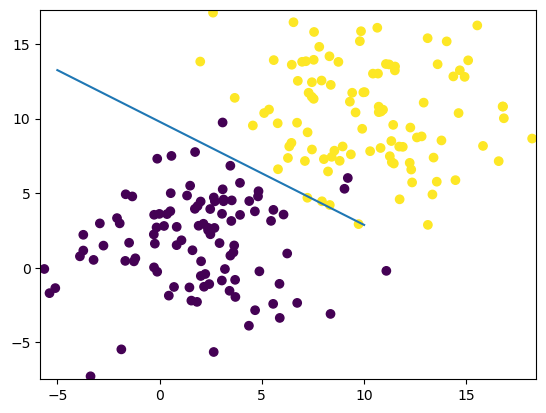

Iteration Number :  24
Current Accuracy : 97.0
Weights are W1 : 5.777642088542816, W2 : 15.161221189202031, W0 : -146.75908424821375


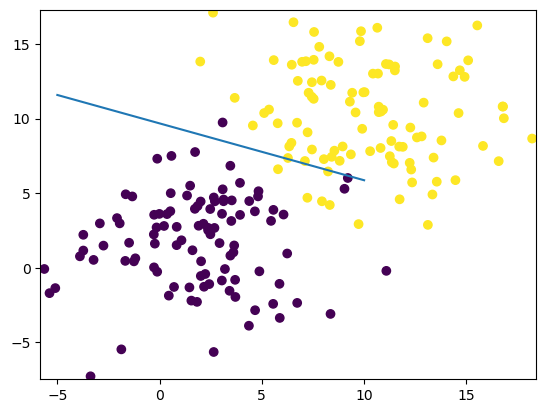

Iteration Number :  25
Current Accuracy : 94.0
Weights are W1 : 7.55561070428252, W2 : 16.340971606580556, W0 : -148.75908424821375


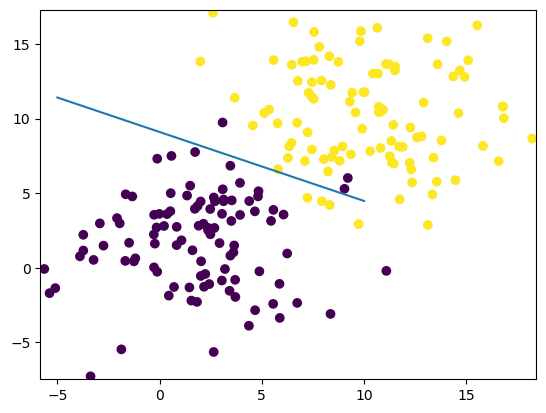

Iteration Number :  26
Current Accuracy : 94.5
Weights are W1 : 7.394157254885959, W2 : 14.602434139908354, W0 : -151.75908424821375


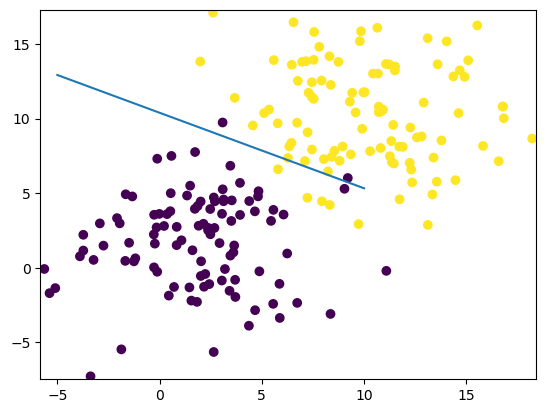

Iteration Number :  27
Current Accuracy : 95.0
Weights are W1 : 7.187670483198607, W2 : 17.082976768012752, W0 : -153.75908424821375


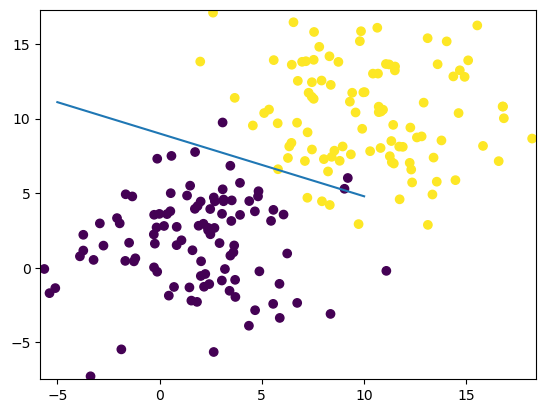

Iteration Number :  28
Current Accuracy : 93.5
Weights are W1 : 7.331560220188212, W2 : 17.70886260598235, W0 : -156.75908424821375


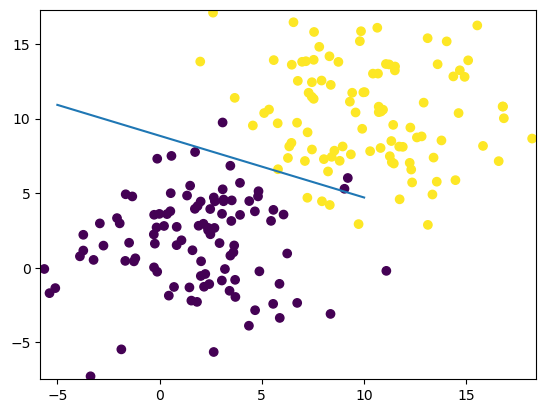

Iteration Number :  29
Current Accuracy : 93.5
Weights are W1 : 7.4754499571778155, W2 : 18.33474844395195, W0 : -159.75908424821375


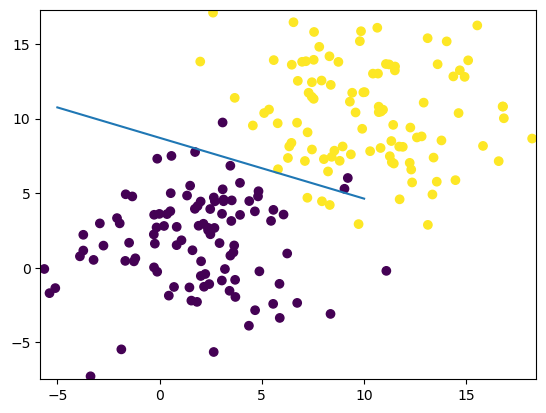

Iteration Number :  30
Current Accuracy : 95.0
Weights are W1 : 10.078731988555825, W2 : 15.278981200848637, W0 : -161.75908424821375


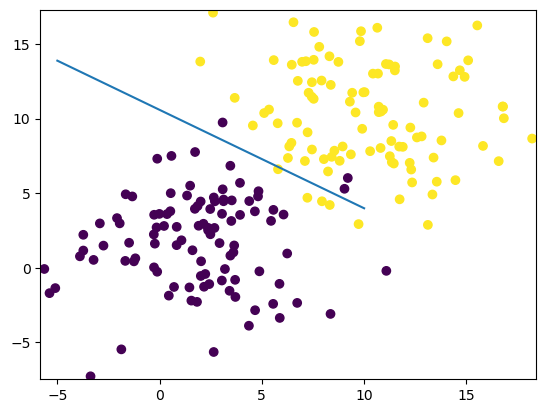

Iteration Number :  31
Current Accuracy : 95.0
Weights are W1 : 5.639207842063895, W2 : 20.471747048719653, W0 : -163.75908424821375


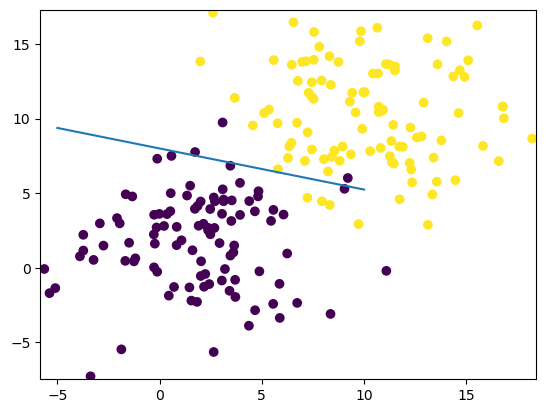

Iteration Number :  32
Current Accuracy : 95.5
Weights are W1 : 10.379249259162227, W2 : 17.038122873223706, W0 : -164.75908424821375


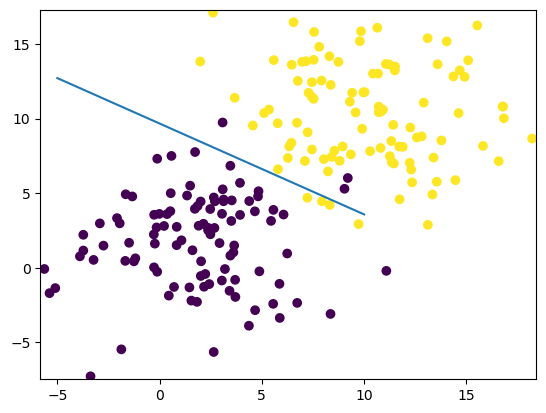

Iteration Number :  33
Current Accuracy : 95.5
Weights are W1 : 10.34443911433498, W2 : 17.132480350506718, W0 : -165.75908424821375


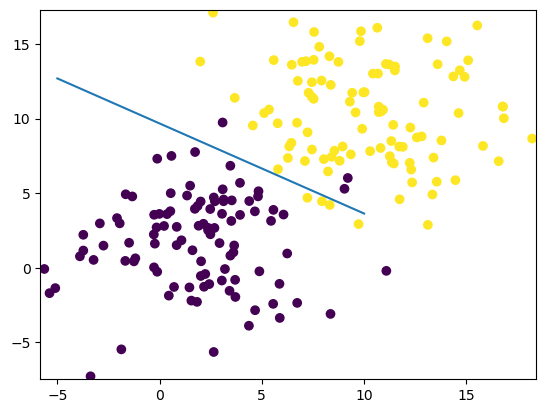

Iteration Number :  34
Current Accuracy : 95.5
Weights are W1 : 10.309628969507733, W2 : 17.22683782778973, W0 : -166.75908424821375


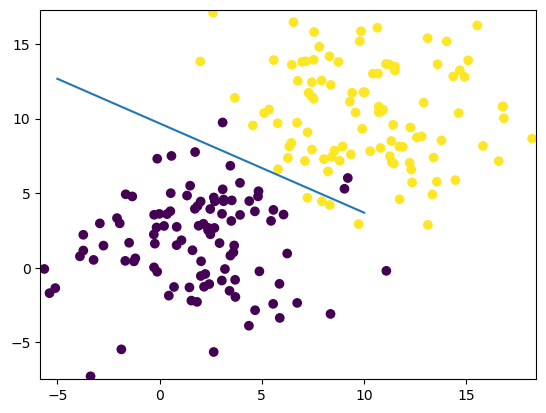

Iteration Number :  35
Current Accuracy : 95.5
Weights are W1 : 10.274818824680485, W2 : 17.32119530507274, W0 : -167.75908424821375


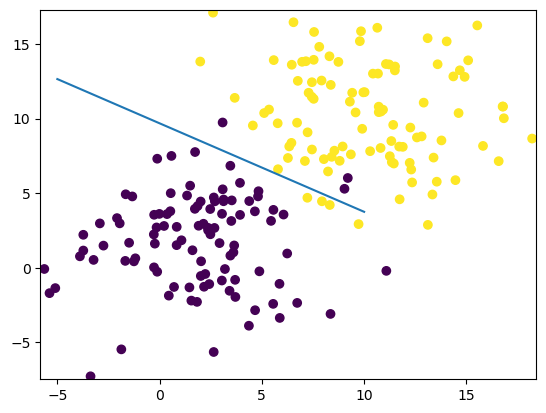

Iteration Number :  36
Current Accuracy : 95.5
Weights are W1 : 9.502100695941666, W2 : 18.9610266938822, W0 : -168.75908424821375


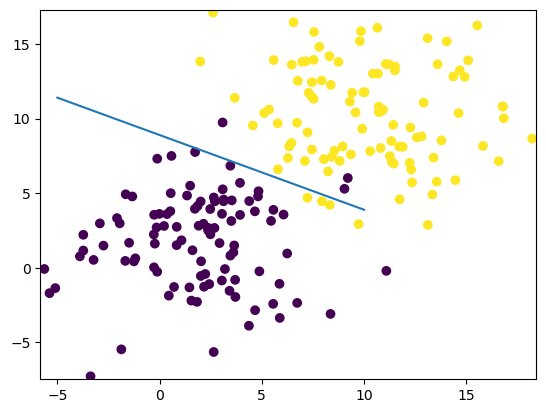

Iteration Number :  37
Current Accuracy : 95.5
Weights are W1 : 9.38822446560009, W2 : 23.726241943202375, W0 : -169.75908424821375


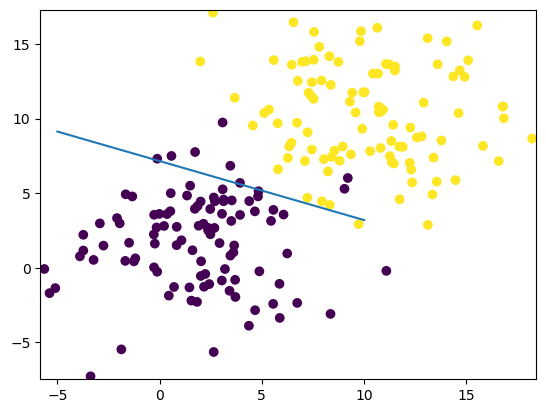

Iteration Number :  38
Current Accuracy : 95.0
Weights are W1 : 6.543811557389239, W2 : 19.742863385914326, W0 : -171.75908424821375


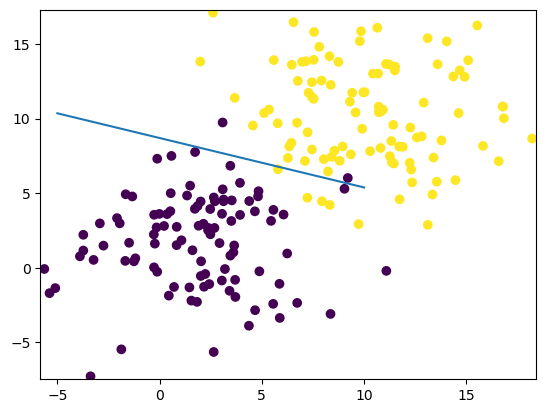

Iteration Number :  39
Current Accuracy : 95.5
Weights are W1 : 10.545944990575999, W2 : 17.85471312194483, W0 : -172.75908424821375


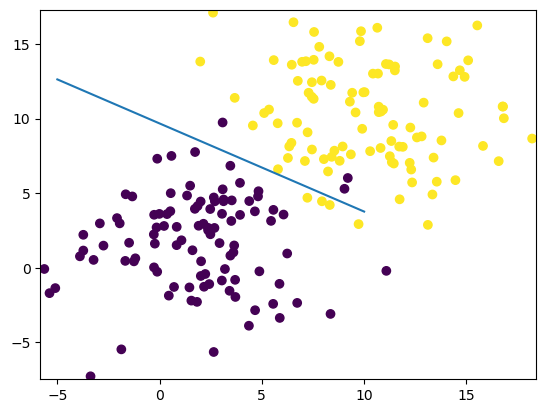

Iteration Number :  40
Current Accuracy : 95.5
Weights are W1 : 10.049121854809249, W2 : 18.805012006700817, W0 : -173.75908424821375


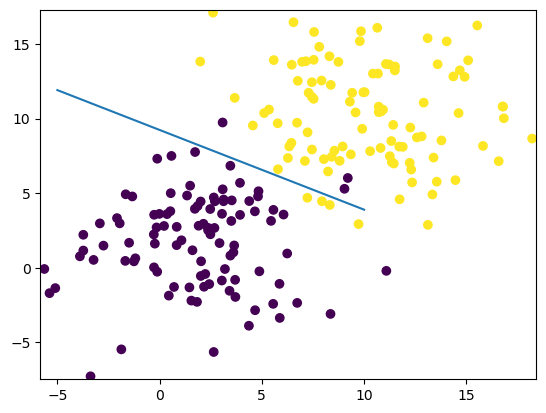

Iteration Number :  41
Current Accuracy : 95.5
Weights are W1 : 9.552298719042502, W2 : 19.755310891456805, W0 : -174.75908424821375


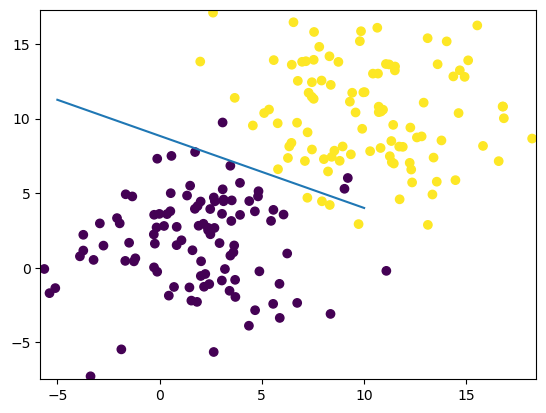

Iteration Number :  42
Current Accuracy : 95.5
Weights are W1 : 9.43842248870093, W2 : 24.520526140776983, W0 : -175.75908424821375


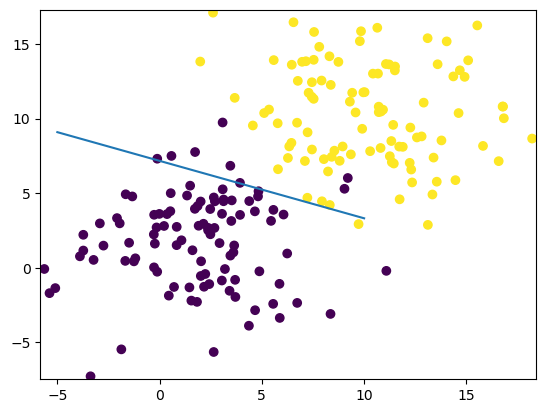

Iteration Number :  43
Current Accuracy : 96.0
Weights are W1 : 10.521703768908488, W2 : 15.46050105908051, W0 : -177.75908424821375


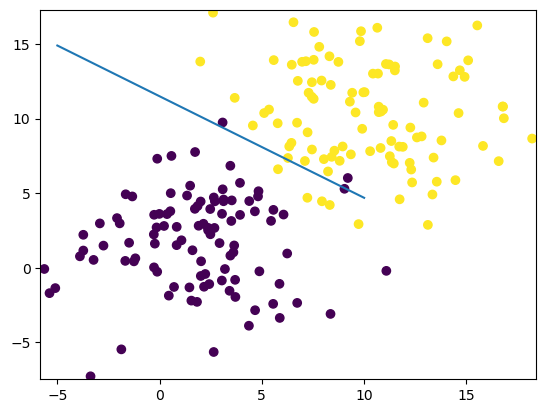

Iteration Number :  44
Current Accuracy : 94.5
Weights are W1 : 8.902883539710407, W2 : 20.22747127195478, W0 : -178.75908424821375


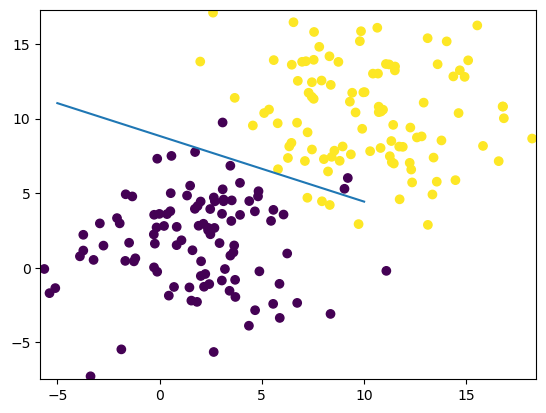

Iteration Number :  45
Current Accuracy : 95.5
Weights are W1 : 14.696181007661162, W2 : 22.569356965118963, W0 : -179.75908424821375


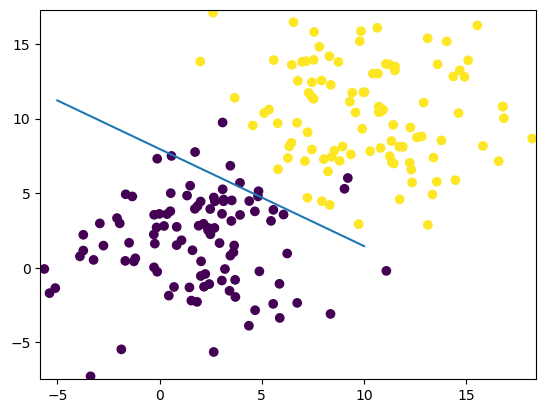

Iteration Number :  46
Current Accuracy : 94.0
Weights are W1 : 14.161566954645433, W2 : 14.64434259690185, W0 : -181.75908424821375


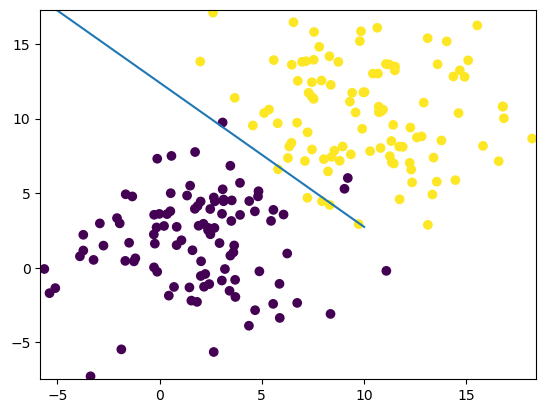

Iteration Number :  47
Current Accuracy : 94.5
Weights are W1 : 16.96652712970964, W2 : 20.30269791995971, W0 : -182.75908424821375


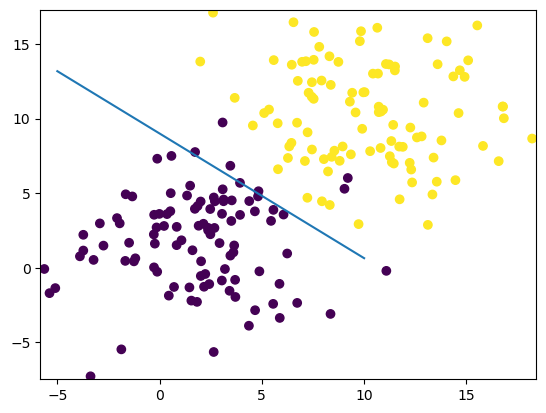

Iteration Number :  48
Current Accuracy : 94.0
Weights are W1 : 11.76356677232621, W2 : 19.112026369530202, W0 : -184.75908424821375


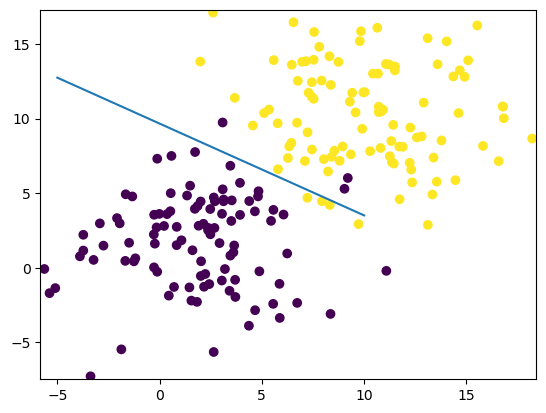

Iteration Number :  49
Current Accuracy : 96.0
Weights are W1 : 18.571738210282803, W2 : 18.697498286599377, W0 : -184.75908424821375


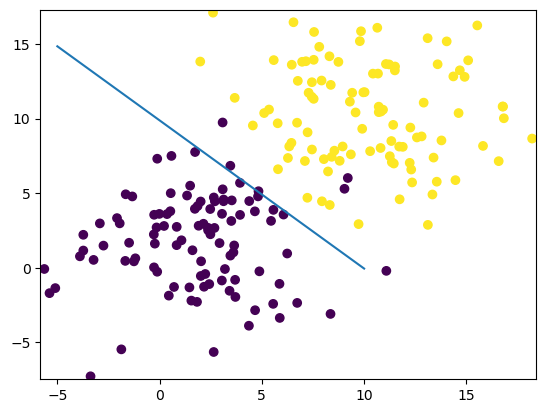

Iteration Number :  50
Current Accuracy : 96.0
Weights are W1 : 18.163930172690932, W2 : 19.74002764821929, W0 : -184.75908424821375


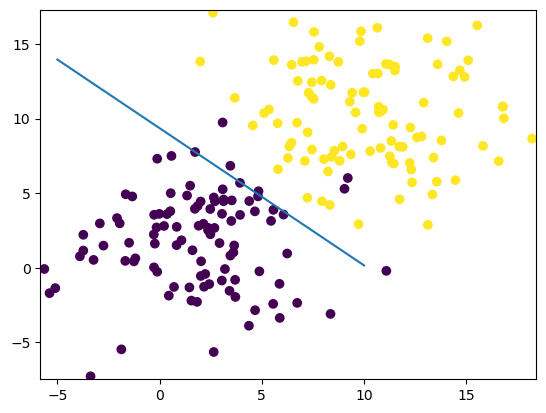

Iteration Number :  51
Current Accuracy : 95.5
Weights are W1 : 10.872350090888611, W2 : 23.879306558480078, W0 : -185.75908424821375


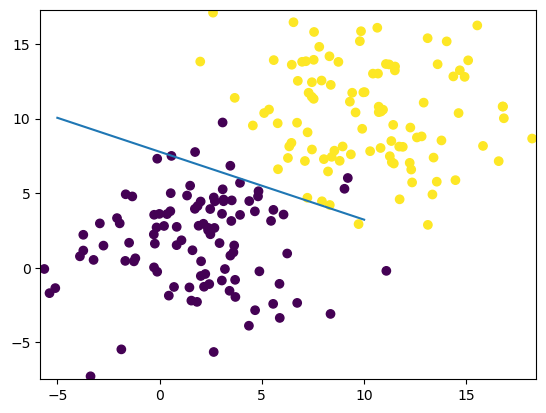

Iteration Number :  52
Current Accuracy : 95.0
Weights are W1 : 13.58460934905614, W2 : 17.919231746131764, W0 : -187.75908424821375


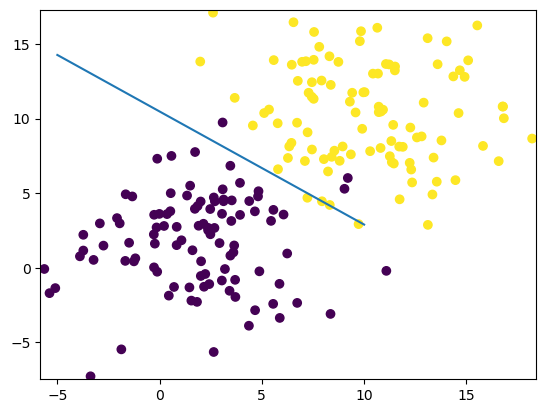

Iteration Number :  53
Current Accuracy : 96.0
Weights are W1 : 20.009601915703108, W2 : 17.753357119049426, W0 : -187.75908424821375


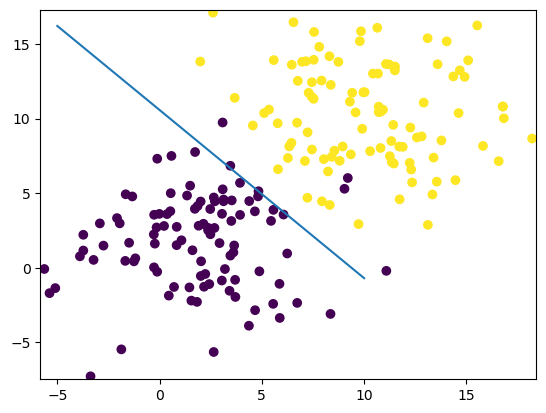

Iteration Number :  54
Current Accuracy : 96.0
Weights are W1 : 17.608916012510903, W2 : 22.009707001414995, W0 : -187.75908424821375
Current Accuracy : 96.0
Weights are W1 : 17.608916012510903, W2 : 22.009707001414995, W0 : -187.75908424821375


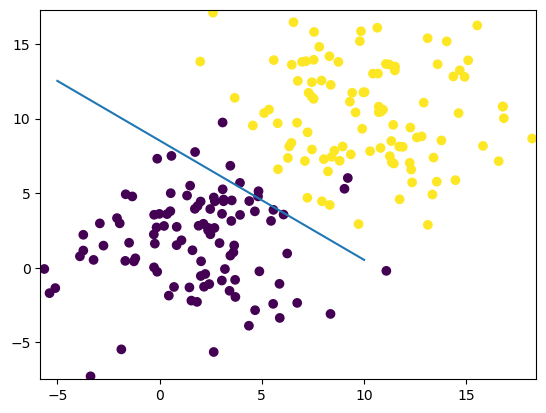

Iteration Number :  55
Current Accuracy : 95.5
Weights are W1 : 17.5082681265443, W2 : 22.363016772144086, W0 : -188.75908424821375


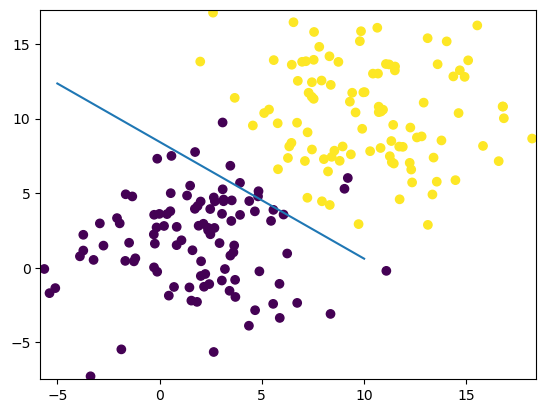

Iteration Number :  56
Current Accuracy : 94.5
Weights are W1 : 16.749653275152752, W2 : 22.889545915201637, W0 : -189.75908424821375


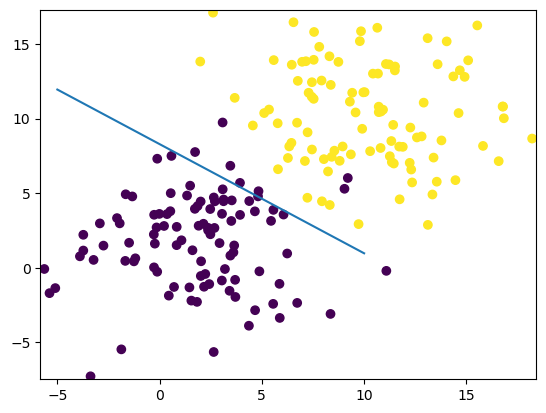

Iteration Number :  57
Current Accuracy : 94.5
Weights are W1 : 15.67556595558206, W2 : 23.01580939496993, W0 : -190.75908424821375


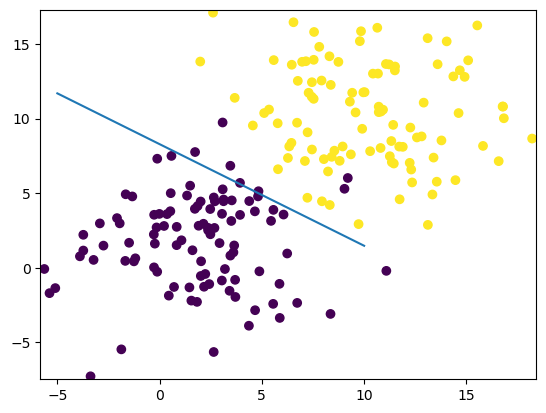

Iteration Number :  58
Current Accuracy : 94.5
Weights are W1 : 19.711841796378728, W2 : 19.78257901802725, W0 : -191.75908424821375


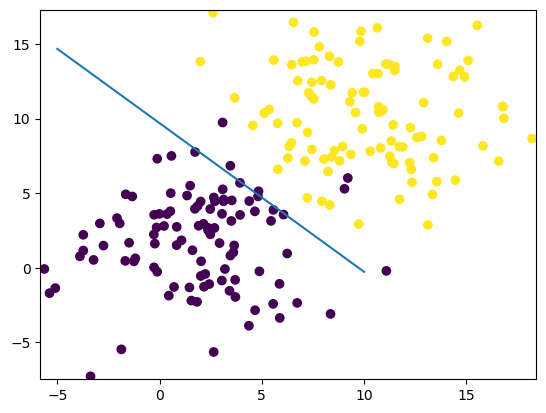

Iteration Number :  59
Current Accuracy : 95.5
Weights are W1 : 12.499327800090734, W2 : 19.25100015625087, W0 : -192.75908424821375


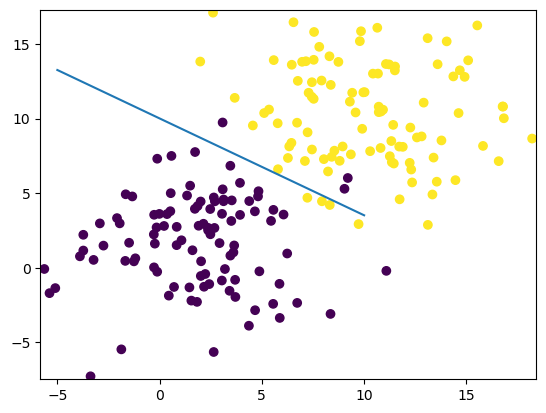

Iteration Number :  60
Current Accuracy : 96.0
Weights are W1 : 19.307499238047328, W2 : 18.836472073320046, W0 : -192.75908424821375


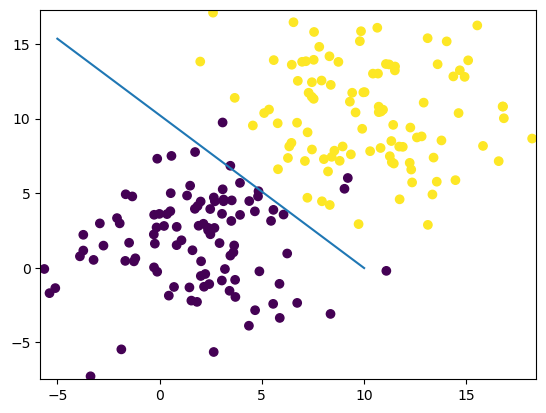

Iteration Number :  61
Current Accuracy : 96.0
Weights are W1 : 16.906813334855123, W2 : 23.092821955685615, W0 : -192.75908424821375


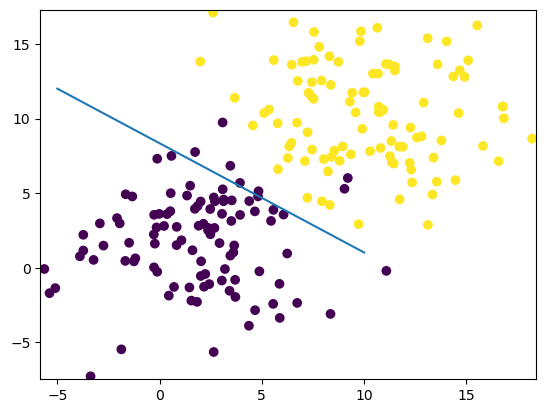

Iteration Number :  62
Current Accuracy : 94.5
Weights are W1 : 15.83272601528443, W2 : 23.21908543545391, W0 : -193.75908424821375


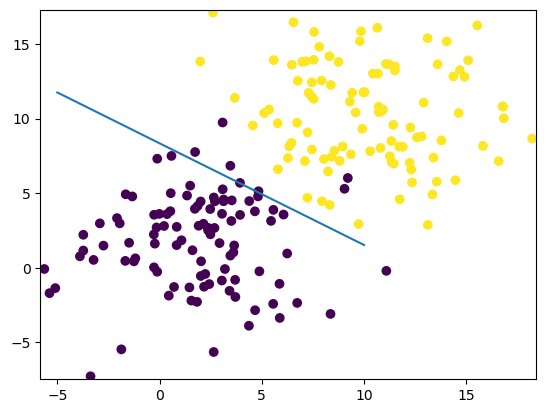

Iteration Number :  63
Current Accuracy : 94.5
Weights are W1 : 19.8690018560811, W2 : 19.985855058511227, W0 : -194.75908424821375


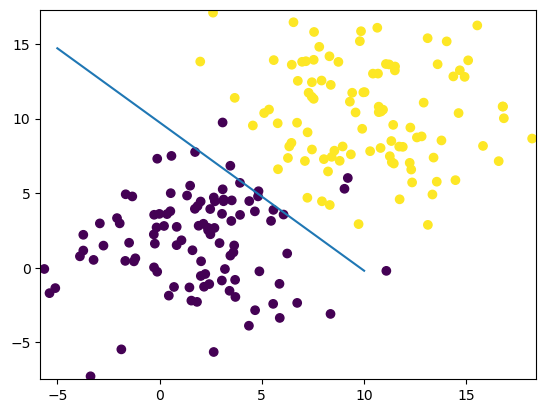

Iteration Number :  64
Current Accuracy : 96.0
Weights are W1 : 19.461193818489228, W2 : 21.028384420131136, W0 : -194.75908424821375


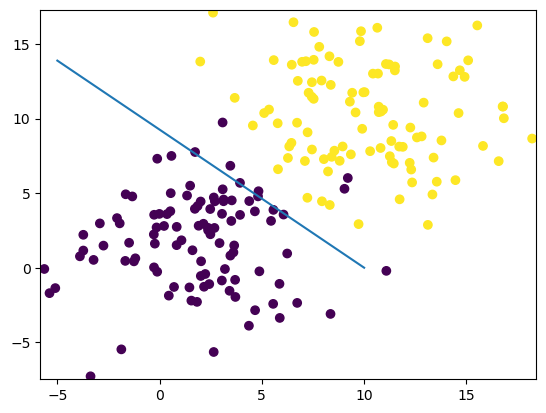

Iteration Number :  65
Current Accuracy : 95.5
Weights are W1 : 12.169613736686907, W2 : 25.16766333039192, W0 : -195.75908424821375
Current Accuracy : 95.5
Weights are W1 : 12.169613736686907, W2 : 25.16766333039192, W0 : -195.75908424821375


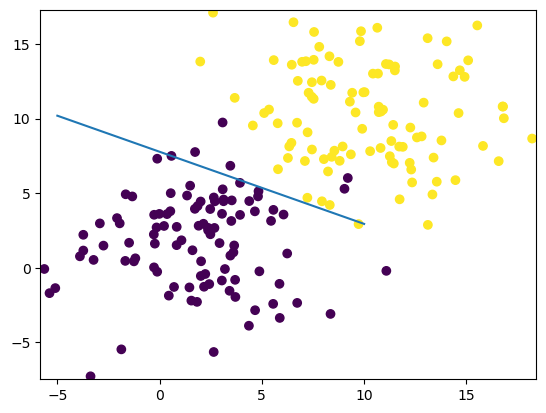

Iteration Number :  66
Current Accuracy : 95.0
Weights are W1 : 13.943510905744606, W2 : 19.042724727705988, W0 : -197.75908424821375


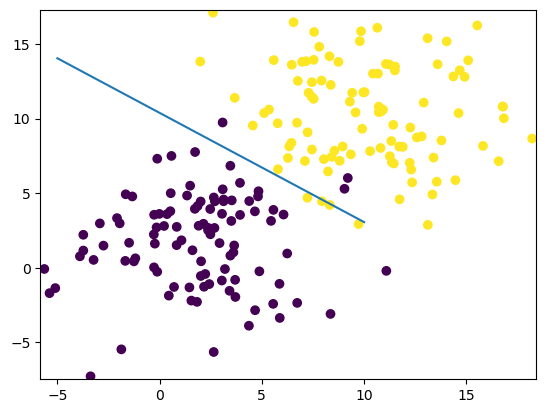

Iteration Number :  67
Current Accuracy : 96.0
Weights are W1 : 20.751682343701205, W2 : 18.62819664477516, W0 : -197.75908424821375


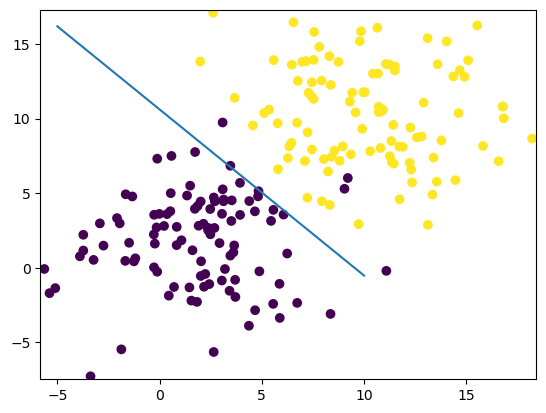

Iteration Number :  68
Current Accuracy : 96.0
Weights are W1 : 18.350996440508993, W2 : 22.884546527140728, W0 : -197.75908424821375


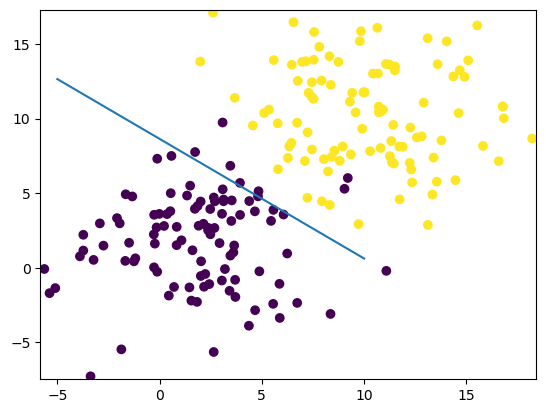

Iteration Number :  69
Current Accuracy : 95.5
Weights are W1 : 18.25034855454239, W2 : 23.23785629786982, W0 : -198.75908424821375


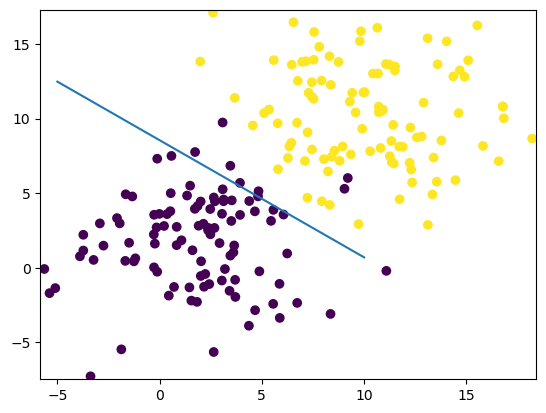

Iteration Number :  70
Current Accuracy : 95.5
Weights are W1 : 18.14970066857579, W2 : 23.59116606859891, W0 : -199.75908424821375


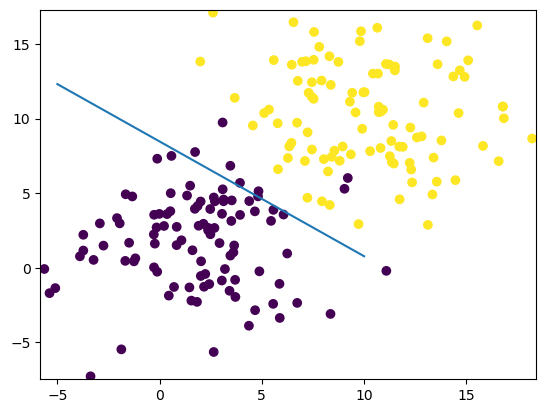

Iteration Number :  71
Current Accuracy : 94.5
Weights are W1 : 17.39108581718424, W2 : 24.11769521165646, W0 : -200.75908424821375


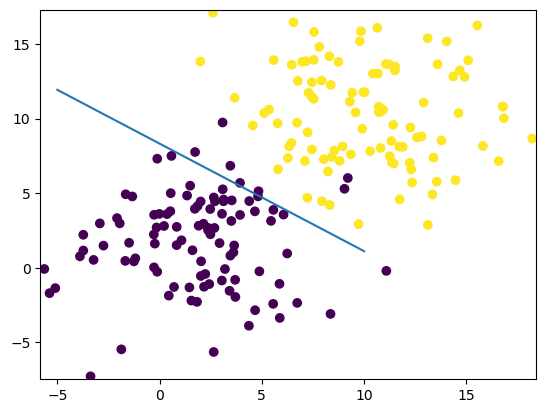

Iteration Number :  72
Current Accuracy : 94.5
Weights are W1 : 16.316998497613547, W2 : 24.243958691424755, W0 : -201.75908424821375


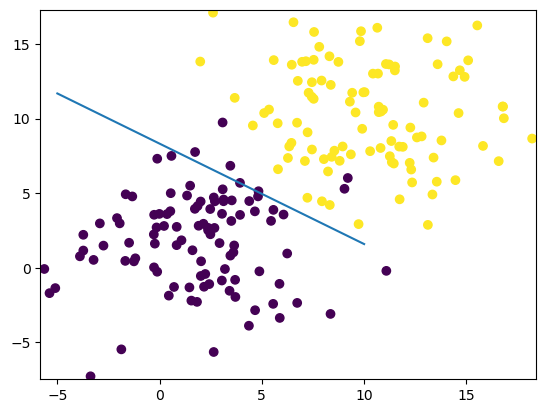

Iteration Number :  73
Current Accuracy : 94.5
Weights are W1 : 15.242911178042855, W2 : 24.370222171193046, W0 : -202.75908424821375


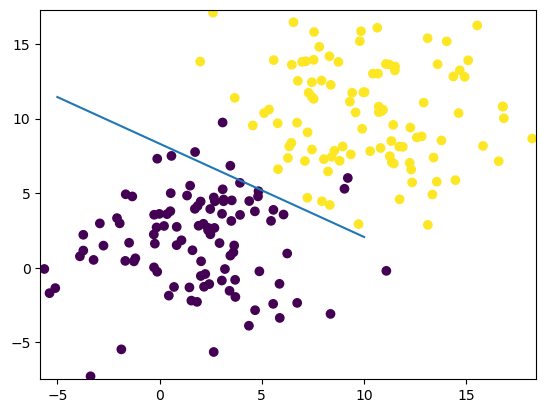

Iteration Number :  74
Current Accuracy : 94.5
Weights are W1 : 16.96964330670667, W2 : 23.8712999343391, W0 : -203.75908424821375


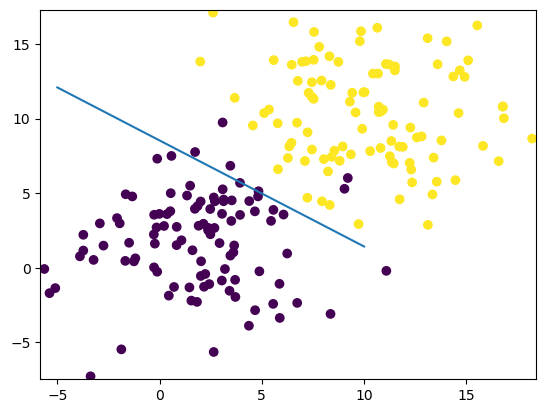

Iteration Number :  75
Current Accuracy : 94.5
Weights are W1 : 15.895555987135976, W2 : 23.997563414107393, W0 : -204.75908424821375


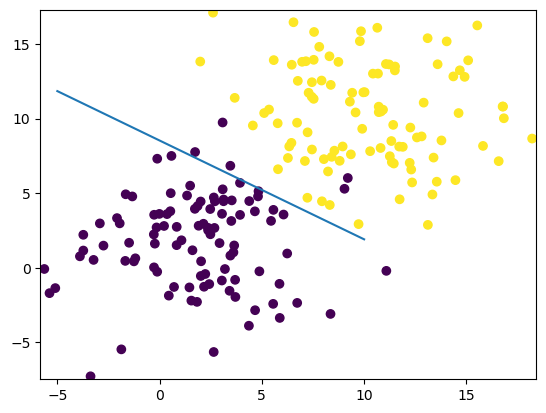

Iteration Number :  76
Current Accuracy : 94.5
Weights are W1 : 17.622288115799794, W2 : 23.498641177253447, W0 : -205.75908424821375


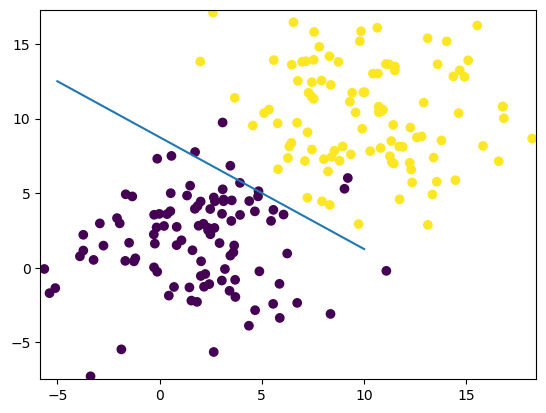

Iteration Number :  77
Current Accuracy : 94.5
Weights are W1 : 16.548200796229104, W2 : 23.62490465702174, W0 : -206.75908424821375


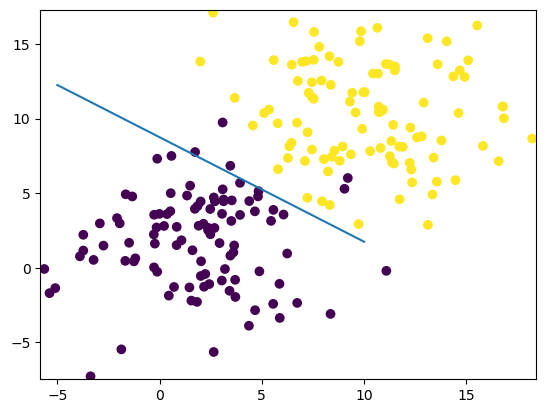

Iteration Number :  78
Current Accuracy : 94.5
Weights are W1 : 16.597527527471726, W2 : 26.740068604202705, W0 : -207.75908424821375


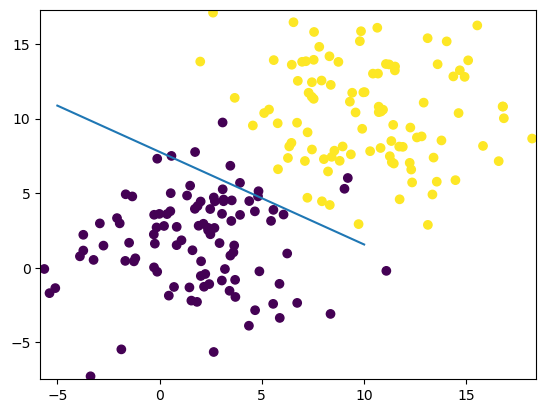

Iteration Number :  79
Current Accuracy : 94.5
Weights are W1 : 17.51631807350137, W2 : 23.652511563225346, W0 : -208.75908424821375


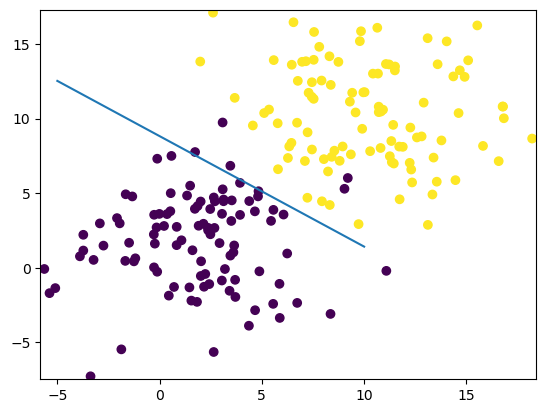

Iteration Number :  80
Current Accuracy : 94.5
Weights are W1 : 16.44223075393068, W2 : 23.77877504299364, W0 : -209.75908424821375


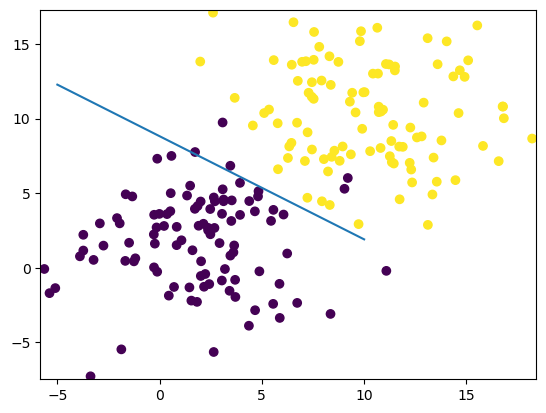

Iteration Number :  81
Current Accuracy : 94.5
Weights are W1 : 18.168962882594496, W2 : 23.279852806139694, W0 : -210.75908424821375


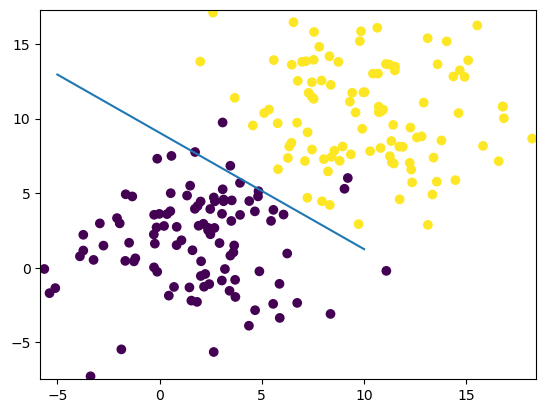

Iteration Number :  82
Current Accuracy : 94.5
Weights are W1 : 17.094875563023805, W2 : 23.406116285907988, W0 : -211.75908424821375


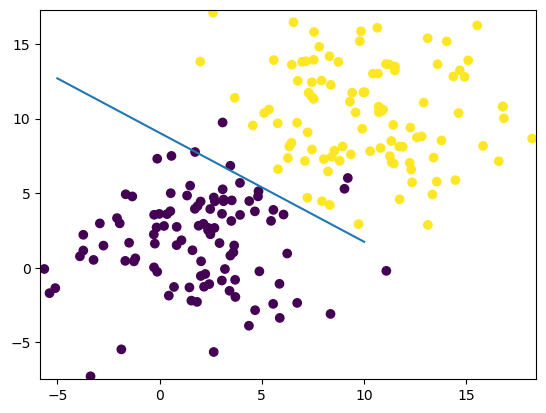

Iteration Number :  83
Current Accuracy : 94.5
Weights are W1 : 17.144202294266428, W2 : 26.52128023308895, W0 : -212.75908424821375


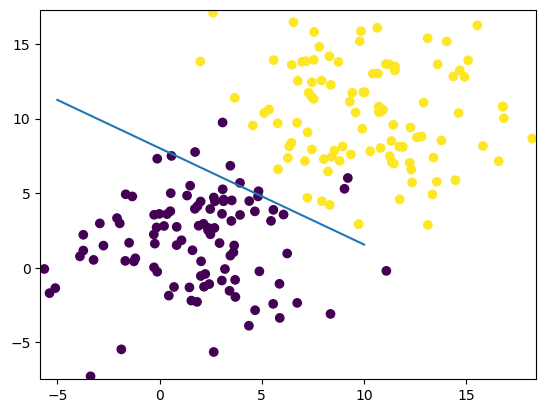

Iteration Number :  84
Current Accuracy : 94.5
Weights are W1 : 18.062992840296072, W2 : 23.433723192111593, W0 : -213.75908424821375


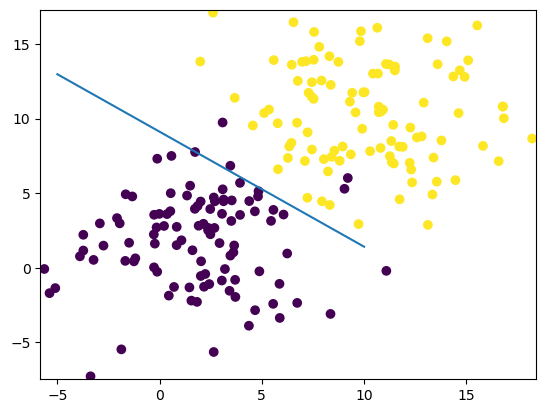

Iteration Number :  85
Current Accuracy : 94.5
Weights are W1 : 16.988905520725382, W2 : 23.559986671879887, W0 : -214.75908424821375


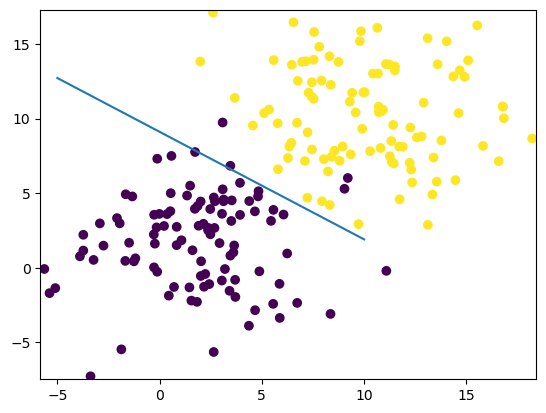

Iteration Number :  86
Current Accuracy : 94.5
Weights are W1 : 18.715637649389194, W2 : 23.061064435025937, W0 : -215.75908424821375


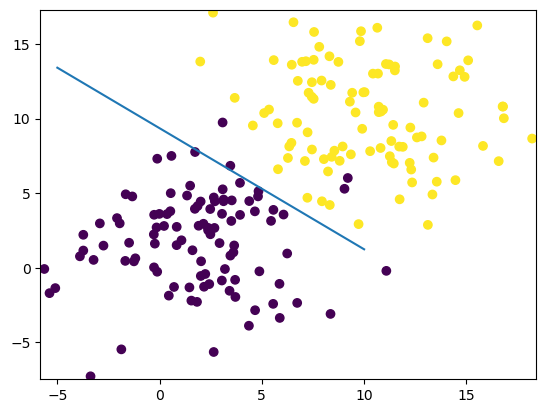

Iteration Number :  87
Current Accuracy : 94.5
Weights are W1 : 17.6415503298185, W2 : 23.187327914794228, W0 : -216.75908424821375


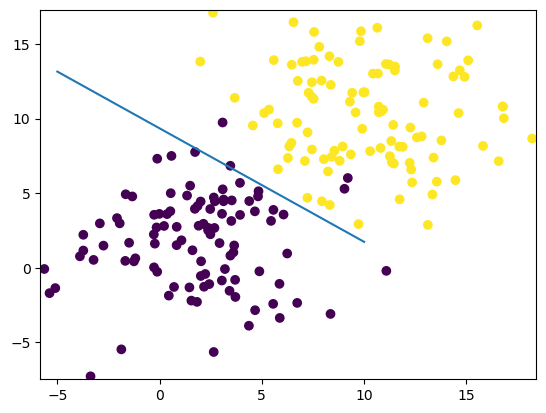

Iteration Number :  88
Current Accuracy : 94.5
Weights are W1 : 17.690877061061123, W2 : 26.30249186197519, W0 : -217.75908424821375


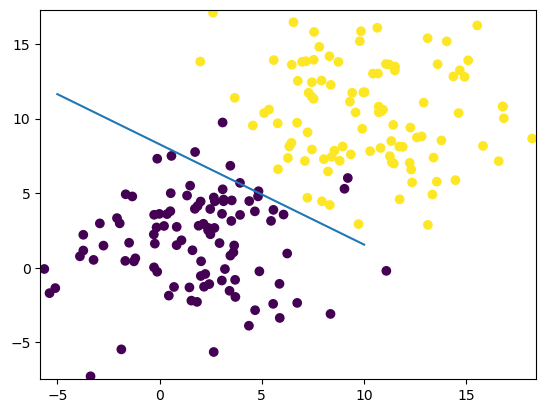

Iteration Number :  89
Current Accuracy : 94.5
Weights are W1 : 18.609667607090763, W2 : 23.214934820997833, W0 : -218.75908424821375


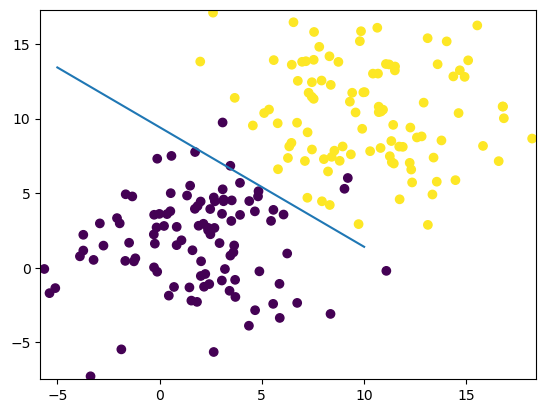

Iteration Number :  90
Current Accuracy : 94.5
Weights are W1 : 17.53558028752007, W2 : 23.341198300766127, W0 : -219.75908424821375


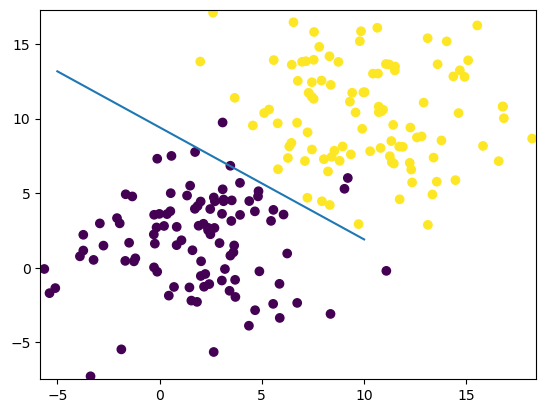

Iteration Number :  91
Current Accuracy : 94.5
Weights are W1 : 17.965601530546493, W2 : 26.611456548574587, W0 : -220.75908424821375


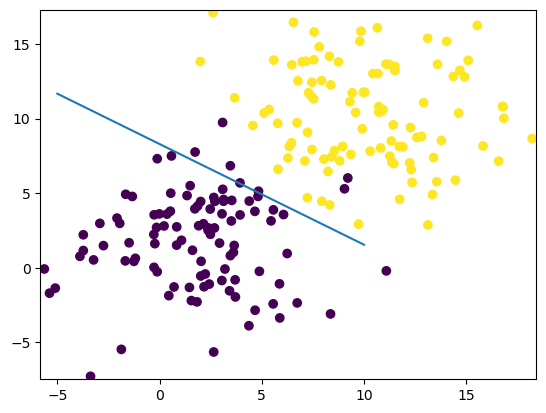

Iteration Number :  92
Current Accuracy : 94.5
Weights are W1 : 18.884392076576134, W2 : 23.52389950759723, W0 : -221.75908424821375


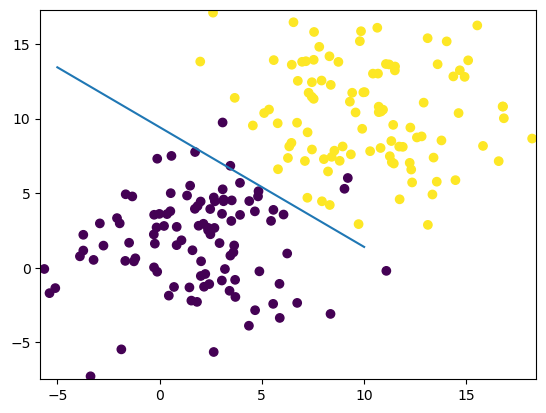

Iteration Number :  93
Current Accuracy : 94.5
Weights are W1 : 17.81030475700544, W2 : 23.650162987365523, W0 : -222.75908424821375


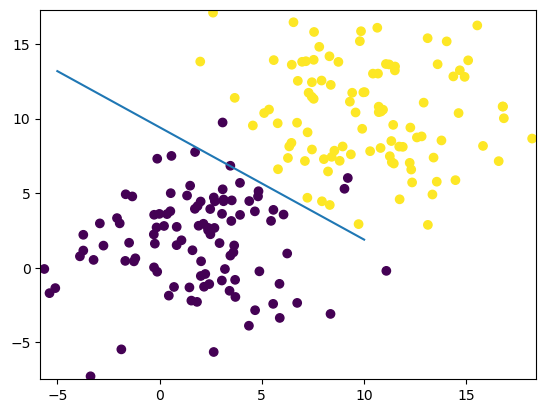

Iteration Number :  94
Current Accuracy : 94.0
Weights are W1 : 13.872389562039496, W2 : 22.401204888697418, W0 : -224.75908424821375


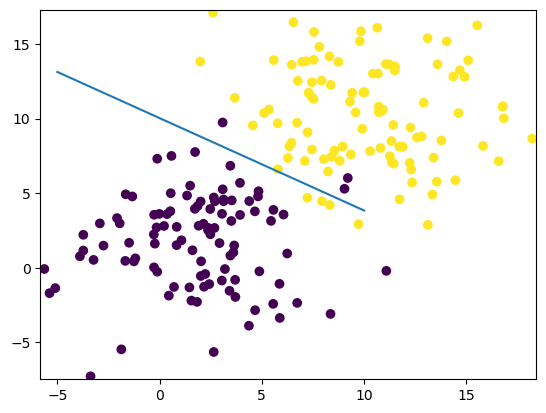

Iteration Number :  95
Current Accuracy : 96.0
Weights are W1 : 21.7113408730996, W2 : 20.403160758148765, W0 : -224.75908424821375


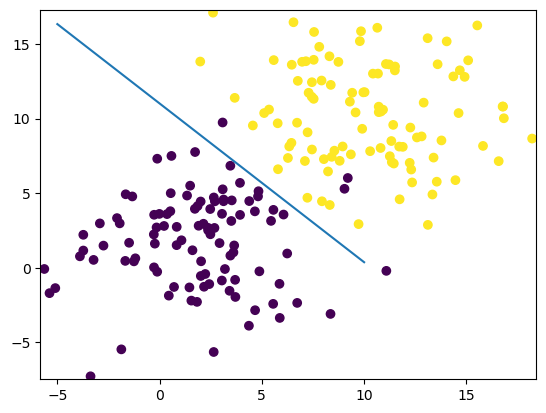

Iteration Number :  96
Current Accuracy : 95.5
Weights are W1 : 16.964324858278786, W2 : 25.90250247653334, W0 : -225.75908424821375


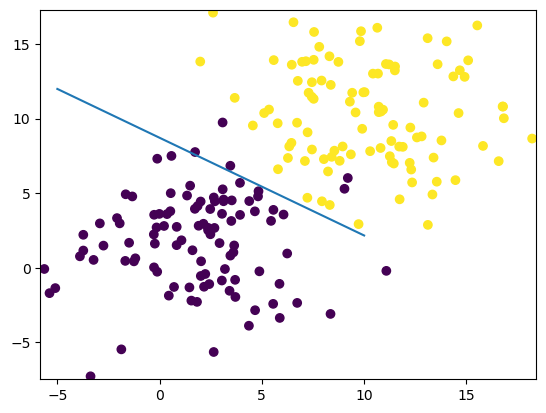

Iteration Number :  97
Current Accuracy : 96.0
Weights are W1 : 22.569281722483872, W2 : 20.213055743511433, W0 : -225.75908424821375


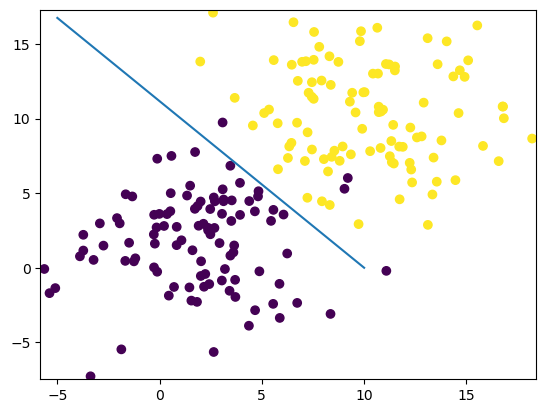

Iteration Number :  98
Current Accuracy : 95.5
Weights are W1 : 17.822265707663057, W2 : 25.712397461896007, W0 : -226.75908424821375


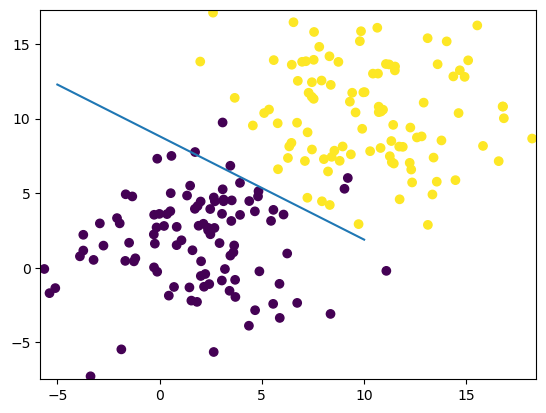

Iteration Number :  99
Current Accuracy : 96.0
Weights are W1 : 23.427222571868143, W2 : 20.0229507288741, W0 : -226.75908424821375


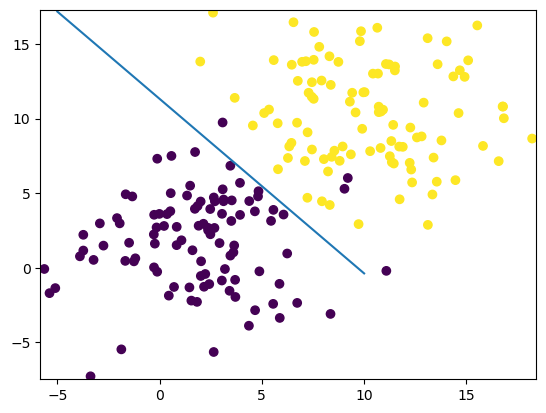

Iteration Number :  100
Current Accuracy : 96.5
Weights are W1 : 19.65364599065142, W2 : 25.74933873821947, W0 : -227.75908424821375


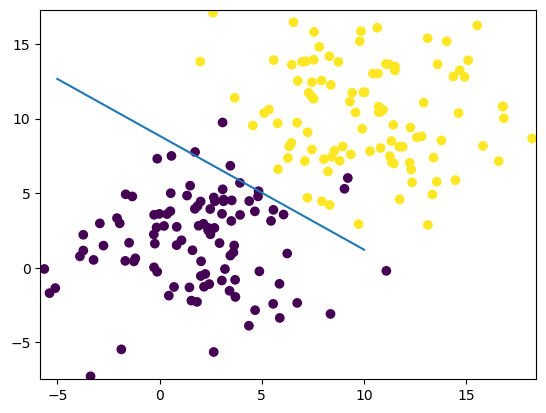

In [ ]:
# Call the perceptron_training function to start the training process.
# The initial random weights (w, w0) and the dataset (x, y) are passed as arguments.
# The function will return the final, trained weights, which are stored back into w and w0.
w,w0=perceptron_training(x,y,w,w0)